<a href="https://colab.research.google.com/github/arpan-chaterji/root2ai_internship/blob/main/root2_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uploading the excel file downloaded from Google Sheets

In [1]:
from google.colab import files
uploaded = files.upload()

Saving root2ai.xlsx to root2ai.xlsx


1. Importing Pandas
2. Reading the excel file into a Dataframe
3. Shuffling the data randomly
4. Deleting rows with null values
5. Deleting a row with a Boolean Value

Taking a glimpse of data

In [4]:
import pandas as pd
data=pd.read_excel('root2ai.xlsx')
data=data.sample(frac=1)

data= data.dropna()
data = data.drop(11445)

data.head(5)

,Text,Target
10503,through smart technology insurance must solve ...,FinTech
2369,data evolution data life critical,Bigdata
5241,still relatively,credit reporting
16527,insurance works cannot certain various stolen ...,FinTech
6740,suggest requisite flexibility manage better fraud,Cyber Security


In [ ]:
Importing TfdifVectorizer from scikit to transform the words into corresponding number.

Vectorizing the data by one-hot vector representation, by searching for non-zero values and replacing them by 1.bit_length
Converting the data into integer type

In [7]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
data['Text'] = data['Text'].fillna('')
tfidf_matrix = tfidf.fit_transform(data['Text'])

tfidf_matrix[tfidf_matrix.nonzero()]=1


metadata=tfidf_matrix.toarray()

Final=np.array(metadata)
Final=Final.astype(int)

Final[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Accessing the distinct elements that occured in the "Target" of the dataframe.


In [8]:
data['Target'].value_counts(dropna=False)

FinTech             8550
Cyber Security      2640
Bigdata             2267
Reg Tech            2206
credit reporting    1748
Blockchain          1375
Neobanks            1069
Microservices        974
Stock Trading        787
Robo Advising        737
Data Security        347
Name: Target, dtype: int64

Assigning each element an unique integer

In [9]:
data['Target']=data['Target'].map({'FinTech': 0, 'Cyber Security': 1, 'Bigdata': 2, 'Reg Tech': 3, 'credit reporting': 4, 'Blockchain': 5, 'Neobanks': 6, 'Microservices': 7, 'Stock Trading': 8, 'Robo Advising': 9, 'Data Security': 10})

Converting the labels from DataFrame to numpy array.

In [11]:
labels=data['Target'].to_numpy()
len(labels)

22700

Importing PreProcessing from scikit to one-hot vectorize/binarize the labels into a matrix 

In [15]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(labels)
labels= lb.transform(labels)


(20000, 11)

Splitting the Training and Test Data and Labels

In [13]:
train_data=Final[:20000]

test_data=Final[20000:]

one_hot_train_labels=labels[:20000]
one_hot_test_labels=labels[20000:]

train_data.shape

(20000, 11202)

Importing model and layers to form the ANN and compiling them



In [26]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(70, activation='relu', input_shape=(11202,)))
model.add(layers.Dense(70, activation='relu'))
model.add(layers.Dense(11, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Splitting the Train and Validation Data and fitting to the ANN

In [27]:
x_val=train_data[13000:]
partial_x_train = train_data[:13000]

y_val=one_hot_train_labels[13000:]
partial_y_train=one_hot_train_labels[:13000]

history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=10,
                  batch_size=512,
                  validation_data=(x_val, y_val))

Epoch 1/10
26/26 [==============================] - 4s 114ms/step - loss: 2.2737 - accuracy: 0.3138 - val_loss: 1.8469 - val_accuracy: 0.4223
Epoch 2/10
26/26 [==============================] - 3s 102ms/step - loss: 1.7187 - accuracy: 0.4526 - val_loss: 1.5565 - val_accuracy: 0.5346
Epoch 3/10
26/26 [==============================] - 3s 101ms/step - loss: 1.3837 - accuracy: 0.5841 - val_loss: 1.3445 - val_accuracy: 0.5974
Epoch 4/10
26/26 [==============================] - 3s 102ms/step - loss: 1.1145 - accuracy: 0.6605 - val_loss: 1.2041 - val_accuracy: 0.6200
Epoch 5/10
26/26 [==============================] - 3s 103ms/step - loss: 0.9064 - accuracy: 0.7229 - val_loss: 1.1215 - val_accuracy: 0.6526
Epoch 6/10
26/26 [==============================] - 3s 101ms/step - loss: 0.7549 - accuracy: 0.7706 - val_loss: 1.0801 - val_accuracy: 0.6610
Epoch 7/10
26/26 [==============================] - 3s 102ms/step - loss: 0.6302 - accuracy: 0.8093 - val_loss: 1.0668 - val_accuracy: 0.6673
Epoch 

Plotting the Training and Validation Loss

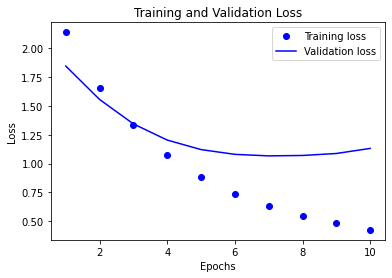

In [29]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plotting the Training and Validation Accuracy

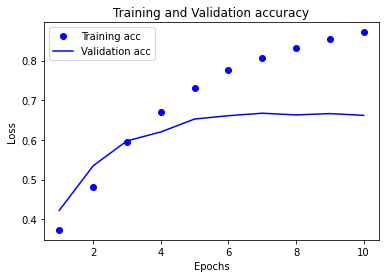

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Testing the Network

In [28]:
results=model.evaluate(test_data, one_hot_test_labels)

85/85 [==============================] - 0s 5ms/step - loss: 1.1473 - accuracy: 0.6674
